## Problem Definition

Apply regression analysis to find flight delay time

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

sns.set_style('whitegrid')

## Load the data

In [2]:
df=pd.read_csv("FlightsProcessed.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Month,DayofMonth,DayOfWeek,SchedDepTime,Carrier,TailNum,DepDelay,Origin,Distance
0,0,0,1,3,4,20.0,WN,N712SW,8.0,IAD,2
1,1,1,1,3,4,8.0,WN,N772SW,19.0,IAD,2
2,2,2,1,3,4,7.0,WN,N428WN,8.0,IND,2
3,3,3,1,3,4,18.0,WN,N464WN,34.0,IND,2
4,4,4,1,3,4,20.0,WN,N726SW,25.0,IND,2


## Feature Engineering

In [3]:
df1=df.drop(df.columns[[0,1]], axis=1)
df1.head()

,Month,DayofMonth,DayOfWeek,SchedDepTime,Carrier,TailNum,DepDelay,Origin,Distance
0,1,3,4,20.0,WN,N712SW,8.0,IAD,2
1,1,3,4,8.0,WN,N772SW,19.0,IAD,2
2,1,3,4,7.0,WN,N428WN,8.0,IND,2
3,1,3,4,18.0,WN,N464WN,34.0,IND,2
4,1,3,4,20.0,WN,N726SW,25.0,IND,2


Since our data in columns 'DayOfWeek','SchedDepTime' and 'Distance'  (indicating numbers) are categorical data and numbers are chosen only for visual representing of data (see processing step), we have to point out them as type string for further regression analysis

In [4]:
df['DayOfWeek'] = df.DayOfWeek.astype(str)
df['SchedDepTime'] = df.SchedDepTime.astype(str)
df['Distance'] = df.Distance.astype(str)
df['DayOfWeek'].unique()

array(['4', '5', '6', '7', '1', '2', '3'], dtype=object)

Transforming a categorical data to numeric using the pandas function "get_dummies"

In [5]:
df['DayOfWeek'] = pd.get_dummies(df['DayOfWeek'])

In [6]:
df['SchedDepTime'] = pd.get_dummies(df['SchedDepTime'])

In [7]:
df['Distance'] = pd.get_dummies(df['Distance'])

In [8]:
df['Carrier'] = pd.get_dummies(df['Carrier'])

In [9]:
df['Origin'] = pd.get_dummies(df['Origin'])

Applying get_dummis to "TailNumber" columns raises an error "Memory error". Thus way we have to ommit it for further analysis

In [10]:
#df['TailNum'] = pd.get_dummies(df['TailNum'])

----------------------------------------------------------------------------------

In [11]:
X_columns=['DayOfWeek','SchedDepTime','Carrier', 'Origin', 'Distance']
Y_column=['DepDelay']

# split the data

threshold = 0.8
X = df[X_columns]
Y = df[Y_column]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1.0-threshold)

print('X_train', X_train.shape)
print('Y_train', Y_train.shape)
print('X_test', X_test.shape)
print('Y_test', Y_test.shape)

X_train (1549402, 5)
Y_train (1549402, 1)
X_test (387351, 5)
Y_test (387351, 1)


# Model Training 

Applying 2 regression models to train on our categorical data: DecisionTree and RandomForest

## Model Training / Evaluation - Using Split

MODEL RandomForestRegressor10
MAE 34.23762324862301
RMSE 53.233465804168596


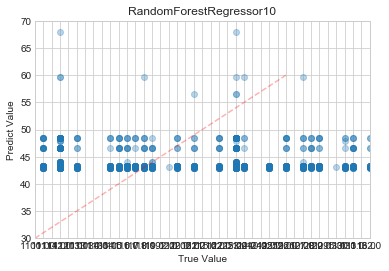

Feature Importance
              0         1
2       Carrier  0.707829
3        Origin  0.175263
4      Distance  0.070710
0     DayOfWeek  0.043880
1  SchedDepTime  0.002318

MODEL RandomForestRegressor100
MAE 34.23282068558342
RMSE 53.23359102995311


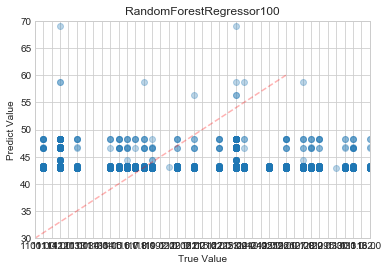

Feature Importance
              0         1
2       Carrier  0.719281
3        Origin  0.168155
4      Distance  0.061368
0     DayOfWeek  0.049568
1  SchedDepTime  0.001628

MODEL DecisionTreeRegressor
MAE 34.2352204813792
RMSE 53.2335900023091


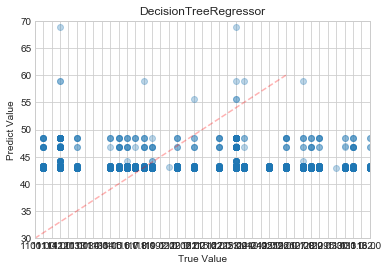

Feature Importance
              0         1
2       Carrier  0.748789
3        Origin  0.161443
4      Distance  0.052430
0     DayOfWeek  0.035876
1  SchedDepTime  0.001462



,model,mae,rmse
1,RandomForestRegressor100,34.232821,53.233591
2,DecisionTreeRegressor,34.235220,53.233590
0,RandomForestRegressor10,34.237623,53.233466


In [12]:
# create a list of models
models = [
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100, n_jobs=4)),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]
results = []                                                #resilts will be save as a list
for m in models:                                            #for each model
    print('MODEL', m[0])                                    #print its name
    model = m[1]                                            #apply model assining it to a variable "model"
    model.fit(X_train, Y_train.values.ravel())              #training model on 0.8 values of dataset
    Y_pred = model.predict(X_test)                          #revealing predicted value based of the model training
    mae = mean_absolute_error(Y_test, Y_pred)               #calculating absolute error value
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))      #calculating std deviation value
    print('MAE', mae)                                       #printing absolute error value
    print('RMSE', rmse)                                     #printing std deviation value
    
    # print the chart
    plt.scatter(Y_test, Y_pred, alpha=0.3)                  #creating a chart Y_pred vs Y_test
    plt.plot(range(30,70, 10), range(30,70, 10), '--r', alpha=0.3, label='Line1')
    plt.title(m[0])
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([30, 70])
    plt.ylim([30, 70])
    plt.show()
    results.append([m[0], mae, rmse])                       #appending name of model and corresponf=ding absolute error and std deviation
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'mae', 'rmse']
df_results = df_results.sort_values(by='mae')
df_results

## Using Cross Validation

In [20]:
models = [
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100, n_jobs=4)),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]

k = 10 
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'mae':[], 'rmse':[]}
    kf = KFold(n_splits=k) #Provides train/test indices to split data in train/test sets (analouge of threshold=0.9).
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        Y_train, Y_test = Y.values[train_index], Y.values[test_index]
        model = m[1]
        model.fit(X_train, Y_train.ravel())
        Y_pred = model.predict(X_test)
        mae = mean_absolute_error(Y_test, Y_pred)
        rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
        results[m[0]]['mae'].append(mae)
        results[m[0]]['rmse'].append(rmse)

MODEL RandomForestRegressor10
MODEL RandomForestRegressor100
MODEL DecisionTreeRegressor


## Evaluation of applied models

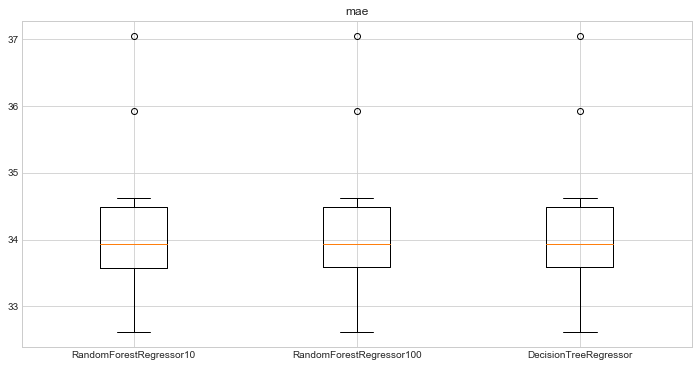

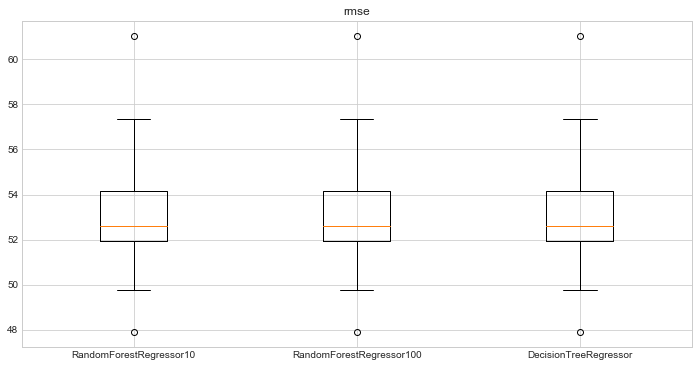

In [21]:
for metric in ['mae', 'rmse']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()